## **Import package**



In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## **Open and read the application train file**

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [22]:
other_train = pd.read_csv('feature_train.csv')
other_test = pd.read_csv('feature_test.csv')

train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')


print("Shape of training data 1: {}".format(train.shape))
print("Shape of test data 1: {}".format(test.shape))
print("Shape of training data 2: {}".format(other_train.shape))
print("Shape of test data 2: {}".format(other_test.shape))

Shape of training data 1: (307511, 122)
Shape of test data 1: (48744, 121)
Shape of training data 2: (307511, 38)
Shape of test data 2: (48744, 38)


In [23]:
other_train = other_train.drop(['SK_ID_CURR'],axis = 1)
other_test = other_test.drop(['SK_ID_CURR'],axis = 1)
other_train

,BUREAU_LOAN_COUNT,BUREAU_LOAN_TYPES,BUREAU_AVERAGE_LOAN_TYPE,BUREAU_ACTIVE_LOANS_PERCENTAGE,BUREAU_CREDIT_ENDDATE_PERCENTAGE,BUREAU_DEBT_CREDIT_RATIO,BUREAU_AVG_CREDITDAYS_PROLONGED,BUREAU_OVERDUE_DEBT_RATIO,CreditCard_AVG_DPD,CreditCard_NO_LOANS,CreditCard_CREDIT_LOAD,CreditCard_INSTALLMENTS_PER_LOAN,last_loan_pos_cash_paid_late_count,last_loan_pos_cash_paid_late_sum,last_loan_pos_cash_paid_late_mean,last_loan_pos_cash_paid_late_with_tolerance_sum,last_loan_pos_cash_paid_late_with_tolerance_mean,last_loan_SK_DPD_sum,last_loan_SK_DPD_mean,last_loan_SK_DPD_max,last_loan_SK_DPD_min,last_loan_SK_DPD_std,last_loan_SK_DPD_DEF_sum,last_loan_SK_DPD_DEF_mean,last_loan_SK_DPD_DEF_max,last_loan_SK_DPD_DEF_min,last_loan_SK_DPD_DEF_std,1_period_trend_SK_DPD,1_period_trend_SK_DPD_DEF,6_period_trend_SK_DPD,6_period_trend_SK_DPD_DEF,12_period_trend_SK_DPD,12_period_trend_SK_DPD_DEF,30_period_trend_SK_DPD,30_period_trend_SK_DPD_DEF,60_period_trend_SK_DPD,60_period_trend_SK_DPD_DEF
0,8.0,2.0,4.0,0.250000,0.625000,0.284122,0.000000,0.0,NaN,NaN,NaN,NaN,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.0,2.0,2.0,0.250000,0.250000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.0,1.0,2.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
307508,4.0,2.0,2.0,0.500000,0.500000,0.453493,0.000000,0.0,NaN,NaN,NaN,NaN,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122378,0.122378,0.012255,0.012255,0.012255,0.012255
307509,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
other_test

,BUREAU_LOAN_COUNT,BUREAU_LOAN_TYPES,BUREAU_AVERAGE_LOAN_TYPE,BUREAU_ACTIVE_LOANS_PERCENTAGE,BUREAU_CREDIT_ENDDATE_PERCENTAGE,BUREAU_DEBT_CREDIT_RATIO,BUREAU_AVG_CREDITDAYS_PROLONGED,BUREAU_OVERDUE_DEBT_RATIO,CreditCard_AVG_DPD,CreditCard_NO_LOANS,CreditCard_CREDIT_LOAD,CreditCard_INSTALLMENTS_PER_LOAN,last_loan_pos_cash_paid_late_count,last_loan_pos_cash_paid_late_sum,last_loan_pos_cash_paid_late_mean,last_loan_pos_cash_paid_late_with_tolerance_sum,last_loan_pos_cash_paid_late_with_tolerance_mean,last_loan_SK_DPD_sum,last_loan_SK_DPD_mean,last_loan_SK_DPD_max,last_loan_SK_DPD_min,last_loan_SK_DPD_std,last_loan_SK_DPD_DEF_sum,last_loan_SK_DPD_DEF_mean,last_loan_SK_DPD_DEF_max,last_loan_SK_DPD_DEF_min,last_loan_SK_DPD_DEF_std,1_period_trend_SK_DPD,1_period_trend_SK_DPD_DEF,6_period_trend_SK_DPD,6_period_trend_SK_DPD_DEF,12_period_trend_SK_DPD,12_period_trend_SK_DPD_DEF,30_period_trend_SK_DPD,30_period_trend_SK_DPD_DEF,60_period_trend_SK_DPD,60_period_trend_SK_DPD_DEF
0,7.0,1.0,7.000000,0.428571,0.428571,0.410555,0.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.350000,0.35,0.350000,0.35,0.350000,0.35
1,3.0,2.0,1.500000,0.666667,0.666667,0.864992,0.0,0.0,NaN,NaN,NaN,NaN,11.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00
2,4.0,2.0,2.000000,0.000000,0.000000,0.000000,0.0,NaN,0.010417,1.0,0.512445,1666.0,7.0,2.0,0.285714,0.0,0.0,34.0,4.857143,18.0,0.0,8.315218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.885714,0.0,-0.944056,0.00,-0.196218,0.00,-0.139768,0.00
3,12.0,2.0,6.000000,0.416667,0.416667,0.122498,0.0,0.0,0.000000,1.0,0.165937,821.0,7.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,5.0,3.0,1.666667,0.400000,0.400000,0.497382,0.0,0.0,NaN,NaN,NaN,NaN,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00
48740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00
48741,5.0,3.0,1.666667,0.200000,0.200000,0.009898,0.0,0.0,NaN,NaN,NaN,NaN,2.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00
48742,17.0,2.0,8.500000,0.352941,0.294118,0.204662,0.0,0.0,NaN,NaN,NaN,NaN,19.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00


In [25]:
app_train = pd.concat([train,other_train], axis = 1)
app_test = pd.concat([test,other_test], axis = 1)
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_LOAN_COUNT,BUREAU_LOAN_TYPES,BUREAU_AVERAGE_LOAN_TYPE,BUREAU_ACTIVE_LOANS_PERCENTAGE,BUREAU_CREDIT_ENDDATE_PERCENTAGE,BUREAU_DEBT_CREDIT_RATIO,BUREAU_AVG_CREDITDAYS_PROLONGED,BUREAU_OVERDUE_DEBT_RATIO,CreditCard_AVG_DPD,CreditCard_NO_LOANS,CreditCard_CREDIT_LOAD,CreditCard_INSTALLMENTS_PER_LOAN,last_loan_pos_cash_paid_late_count,last_loan_pos_cash_paid_late_sum,last_loan_pos_cash_paid_late_mean,last_loan_pos_cash_paid_late_with_tolerance_sum,last_loan_pos_cash_paid_late_with_tolerance_mean,last_loan_SK_DPD_sum,last_loan_SK_DPD_mean,last_loan_SK_DPD_max,last_loan_SK_DPD_min,last_loan_SK_DPD_std,last_loan_SK_DPD_DEF_sum,last_loan_SK_DPD_DEF_mean,last_loan_SK_DPD_DEF_max,last_loan_SK_DPD_DEF_min,last_loan_SK_DPD_DEF_std,1_period_trend_SK_DPD,1_period_trend_SK_DPD_DEF,6_period_trend_SK_DPD,6_period_trend_SK_DPD_DEF,12_period_trend_SK_DPD,12_period_trend_SK_DPD_DEF,30_period_trend_SK_DPD,30_period_trend_SK_DPD_DEF,60_period_trend_SK_DPD,60_period_trend_SK_DPD_DEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0,0.0,1.0,8.0,2.0,4.0,0.250000,0.625000,0.284122,0.000000,0.0,NaN,NaN,NaN,NaN,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0,0.0,0.0,4.0,2.0,2.0,0.250000,0.250000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,0.0,0.0,0.0,2.0,1.0,2.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00

In [26]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,BUREAU_LOAN_COUNT,BUREAU_LOAN_TYPES,BUREAU_AVERAGE_LOAN_TYPE,BUREAU_ACTIVE_LOANS_PERCENTAGE,BUREAU_CREDIT_ENDDATE_PERCENTAGE,BUREAU_DEBT_CREDIT_RATIO,BUREAU_AVG_CREDITDAYS_PROLONGED,BUREAU_OVERDUE_DEBT_RATIO,CreditCard_AVG_DPD,CreditCard_NO_LOANS,CreditCard_CREDIT_LOAD,CreditCard_INSTALLMENTS_PER_LOAN,last_loan_pos_cash_paid_late_count,last_loan_pos_cash_paid_late_sum,last_loan_pos_cash_paid_late_mean,last_loan_pos_cash_paid_late_with_tolerance_sum,last_loan_pos_cash_paid_late_with_tolerance_mean,last_loan_SK_DPD_sum,last_loan_SK_DPD_mean,last_loan_SK_DPD_max,last_loan_SK_DPD_min,last_loan_SK_DPD_std,last_loan_SK_DPD_DEF_sum,last_loan_SK_DPD_DEF_mean,last_loan_SK_DPD_DEF_max,last_loan_SK_DPD_DEF_min,last_loan_SK_DPD_DEF_std,1_period_trend_SK_DPD,1_period_trend_SK_DPD_DEF,6_period_trend_SK_DPD,6_period_trend_SK_DPD_DEF,12_period_trend_SK_DPD,12_period_trend_SK_DPD_DEF,30_period_trend_SK_DPD,30_period_trend_SK_DPD_DEF,60_period_trend_SK_DPD,60_period_trend_SK_DPD_DEF
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,0.0,0.0,0.0,7.0,1.0,7.000000,0.428571,0.428571,0.410555,0.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.350000,0.35,0.350000,0.35,0.350000,0.35
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,0.0,0.0,3.0,3.0,2.0,1.500000,0.666667,0.666667,0.864992,0.0,0.0,NaN,NaN,NaN,NaN,11.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,0.0,1.0,4.0,4.0,2.0,2.000000,0.000000,0.000000,0.000000,0.0,NaN,0.010417,1.0,0.512445,1666.0,7.0,2.0,0.285714,0.0,0.0,34.0,4.857143,18.0,0.0,8.315218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.885714,0.0,-0.944056,0.00,-0.196218,0.00,-0.139768,0.00
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.0,0.0,3.0,12.0,2.0,6.000000,0.416667,0.416667,0.122498,0.0,0.0,0.000000,1.0,0.165937,821.0,7.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0,0.000000,0.

In [0]:
def missing_values(df):
    
    total_missing = df.isnull().sum()/df.shape[0]
    percent_missing = total_missing*100
    return percent_missing.sort_values(ascending=False).round(1)




In [28]:
app_train_mis_values = missing_values(app_train)
df_app_train_miss_values= pd.DataFrame({'columns': app_train_mis_values.index, 'missing percent': app_train_mis_values.values})
drop_columns = df_app_train_miss_values[df_app_train_miss_values['missing percent'] >= 30]['columns'].tolist()
drop_columns


['CreditCard_CREDIT_LOAD',
 'CreditCard_AVG_DPD',
 'CreditCard_NO_LOANS',
 'CreditCard_INSTALLMENTS_PER_LOAN',
 'COMMONAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI

In [29]:
app_train = app_train.drop(drop_columns, axis=1)
app_test = app_test.drop(drop_columns, axis=1)

print(app_train.shape)
print(app_test.shape)

(307511, 104)
(48744, 103)


In [30]:
app_train['TARGET'].value_counts(dropna=False)

0    282686
1     24825
Name: TARGET, dtype: int64

In [31]:
app_train.dtypes.value_counts()


float64    52
int64      41
object     11
dtype: int64

In [32]:
app_train.select_dtypes(include=['object']).apply(pd.Series.nunique, axis=0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [33]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [34]:
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 104)
Testing Features shape:  (48744, 103)


In [35]:

app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 196)
Testing Features shape:  (48744, 192)


In [0]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

In [38]:
train_labels = app_train['TARGET']
train_sk_id_curr = app_train['SK_ID_CURR']
test_sk_id_curr = app_test['SK_ID_CURR']

app_train.drop('SK_ID_CURR', inplace=True, axis=1)
app_test.drop('SK_ID_CURR', inplace=True, axis=1)

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)


Training Features shape:  (307511, 191)
Testing Features shape:  (48744, 191)


In [39]:
ratio = (train_labels == 0).sum()/ (train_labels == 1).sum()
ratio

11.387150050352467

In [40]:
X_train, X_test, y_train, y_test = train_test_split(app_train, train_labels, test_size=0.2, stratify=train_labels, random_state=1)
print("Postive examples in train set: {}".format(np.sum(y_train==0)))
print("Negative examples in train set: {}".format(np.sum(y_train==1)))
 
print("Postive examples in test set: {}".format(np.sum(y_test==0)))
print("Negative examples in test set: {}".format(np.sum(y_test==1)))

Postive examples in train set: 226148
Negative examples in train set: 19860
Postive examples in test set: 56538
Negative examples in test set: 4965


In [0]:
clf = XGBClassifier(n_estimators=1000, objective='binary:logistic', gamma=0.1, subsample=0.5, scale_pos_weight=ratio )
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='auc', early_stopping_rounds=10)

In [44]:
n_estimators = clf.best_ntree_limit
clf = XGBClassifier(n_estimators=n_estimators, objective='binary:logistic', gamma=0.1, subsample=0.5, scale_pos_weight=ratio )
clf.fit(app_train.values, train_labels.values, eval_set=[(app_train.values, train_labels.values)], eval_metric='auc')

[0]	validation_0-auc:0.689787
[1]	validation_0-auc:0.698681
[2]	validation_0-auc:0.703561
[3]	validation_0-auc:0.706198
[4]	validation_0-auc:0.707593
[5]	validation_0-auc:0.70945
[6]	validation_0-auc:0.711956
[7]	validation_0-auc:0.714423
[8]	validation_0-auc:0.715801
[9]	validation_0-auc:0.717318
[10]	validation_0-auc:0.717726
[11]	validation_0-auc:0.719654
[12]	validation_0-auc:0.721387
[13]	validation_0-auc:0.722902
[14]	validation_0-auc:0.724039
[15]	validation_0-auc:0.726424
[16]	validation_0-auc:0.727626
[17]	validation_0-auc:0.728564
[18]	validation_0-auc:0.728979
[19]	validation_0-auc:0.730706
[20]	validation_0-auc:0.731319
[21]	validation_0-auc:0.732953
[22]	validation_0-auc:0.733715
[23]	validation_0-auc:0.734125
[24]	validation_0-auc:0.735331
[25]	validation_0-auc:0.736422
[26]	validation_0-auc:0.737205
[27]	validation_0-auc:0.737902
[28]	validation_0-auc:0.738905
[29]	validation_0-auc:0.739711
[30]	validation_0-auc:0.740445
[31]	validation_0-auc:0.741203
[32]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=162, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11.387150050352467,
              seed=None, silent=None, subsample=0.5, verbosity=1)

In [0]:
predictions = clf.predict_proba(app_test.values)[:, 1]


In [0]:
submission = pd.DataFrame({'SK_ID_CURR': test_sk_id_curr.values, 'TARGET': predictions})
submission.head()


,SK_ID_CURR,TARGET
0,100001,0.228113
1,100005,0.557383
2,100013,0.282594
3,100028,0.293898
4,100038,0.601236


In [0]:
submission.to_csv('baseline_xgboost_1.csv', index = False)

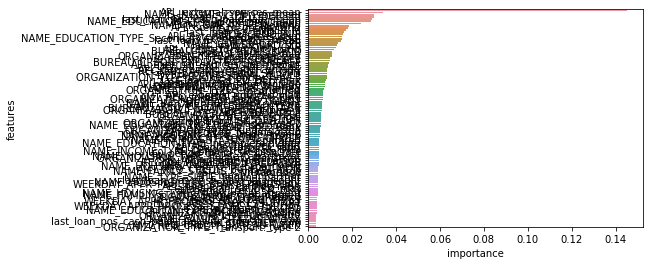

In [0]:
top25 = pd.DataFrame({'features': app_test.columns, 'importance': clf.feature_importances_}).sort_values('importance', ascending=False).head(100)
sns.barplot(x=top25['importance'], y=top25['features'])

In [0]:
new_X_train = X_train [top25['features'].array]
new_X_test = X_test [top25['features'].array]
new_X_train


,APL_external_sources_mean,NAME_INCOME_TYPE_Pensioner,last_loan_SK_DPD_DEF_std,last_loan_pos_cash_paid_late_mean,NAME_EDUCATION_TYPE_Higher education,last_loan_SK_DPD_mean,NAME_INCOME_TYPE_Working,APL_credit_to_goods_ratio,CODE_GENDER_M,last_loan_SK_DPD_sum,CODE_GENDER_F,APL_external_sources_sum,NAME_EDUCATION_TYPE_Secondary / secondary special,last_loan_SK_DPD_DEF_mean,NAME_CONTRACT_TYPE,last_loan_SK_DPD_std,FLAG_OWN_CAR,APL_credit_to_annuity_ratio,BUREAU_DEBT_CREDIT_RATIO,APL_external_sources_min,ORGANIZATION_TYPE_Self-employed,30_period_trend_SK_DPD_DEF,EXT_SOURCE_3,BUREAU_CREDIT_ENDDATE_PERCENTAGE,APL_external_sources_nanmedian,DEF_30_CNT_SOCIAL_CIRCLE,APL_days_employed_percentage,REGION_RATING_CLIENT_W_CITY,12_period_trend_SK_DPD,DEF_60_CNT_SOCIAL_CIRCLE,ORGANIZATION_TYPE_Business Entity Type 3,last_loan_SK_DPD_DEF_max,12_period_trend_SK_DPD_DEF,APL_annuity_income_percentage,ORGANIZATION_TYPE_Military,NAME_FAMILY_STATUS_Married,ORGANIZATION_TYPE_Construction,DAYS_ID_PUBLISH,APL_external_sources_max,AMT_REQ_CREDIT_BUREAU_QRT,...,NAME_EDUCATION_TYPE_Incomplete higher,APL_income_per_child,APL_phone_to_birth_ratio,60_period_trend_SK_DPD,NAME_INCOME_TYPE_Commercial associate,60_period_trend_SK_DPD_DEF,NAME_HOUSING_TYPE_House / apartment,ORGANIZATION_TYPE_Security Ministries,APL_income_per_person,REGION_POPULATION_RELATIVE,ORGANIZATION_TYPE_Police,NAME_HOUSING_TYPE_Office apartment,AMT_REQ_CREDIT_BUREAU_MON,NAME_FAMILY_STATUS_Civil marriage,Unnamed: 0,APL_binary_info_sum,"NAME_TYPE_SUITE_Spouse, partner",last_loan_pos_cash_paid_late_count,NAME_HOUSING_TYPE_Rented apartment,WEEKDAY_APPR_PROCESS_START_THURSDAY,APL_phone_to_employ_ratio,last_loan_SK_DPD_max,30_period_trend_SK_DPD,NAME_HOUSING_TYPE_Municipal apartment,NAME_FAMILY_STATUS_Single / not married,ORGANIZATION_TYPE_Realtor,BUREAU_LOAN_TYPES,WEEKDAY_APPR_PROCESS_START_MONDAY,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START_SATURDAY,6_period_trend_SK_DPD,NAME_EDUCATION_TYPE_Academic degree,ORGANIZATION_TYPE_Medicine,APL_children_ratio,ORGANIZATION_TYPE_University,NAME_FAMILY_STATUS_Widow,last_loan_pos_cash_paid_late_with_tolerance_sum,last_loan_SK_DPD_DEF_sum,AMT_REQ_CREDIT_BUREAU_WEEK,ORGANIZATION_TYPE_Transport: type 2
157774,0.093458,0,0.767948,0.230769,1,0.384615,0,1.237601,1,5.0,0,0.186916,0,0.384615,0,0.767948,1,22.056261,NaN,0.055912,1,-0.021978,NaN,NaN,0.093458,0.0,0.078884,3,-0.010490,0.0,0,2.0,-0.010490,0.306607,0,1,0,-1940,0.131004,NaN,...,0,63000.0,-0.000000,-0.021978,1,-0.021978,1,0,42000.0,0.008068,0,0,NaN,0,157774,8,0,13.0,0,0,-0.000000,2.0,-0.021978,0,0,0,NaN,0,6,1,0.057143,0,0,0.333333,0,0,3.0,5.0,NaN,0
226786,0.387001,0,0.000000,0.000000,0,0.000000,0,1.000000,1,0.0,0,1.161002,1,0.000000,0,0.000000,1,22.701476,0.160706,0.312365,0,-0.026029,0.312365,0.333333,0.327692,0.0,0.024914,2,0.157343,0.0,0,0.0,0.157343,0.071432,0,1,0,-4125,0.520944,0.0,...,0,83250.0,0.089243,-0.010753,1,-0.010753,1,0,55500.0,0.015221,0,0,0.0,0,226786,7,0,3.0,0,1,3.582011,0.0,-0.026029,0,0,0,1.0,0,13,0,0.000000,0,0,0.333333,0,0,0.0,0.0,0.0,0
59166,0.099251,1,0.000000,0.000000,0,0.000000,0,1.099000,1,0.0,0,0.099251,1,0.000000,0,0.000000,1,14.261614,NaN,0.099251,0,0.014461,NaN,NaN,0.099251,0.0,-15.248320,1,0.000000,0.0,0,0.0,0.000000,0.085622,0,1,0,-4545,0.099251,NaN,...,0,202500.0,-0.000000,-0.002362,0,-0.002362,0,0,101250.0,0.046220,0,0,NaN,0,59166,9,0,19.0,0,1,0.000000,0.0,0.014461,1,0,0,NaN,0,18,0,0.000000,0,0,0.000000,0,0,0.0,0.0,NaN,0
275596,0.164797,0,0.000000,0.000000,0,0.000000,1,1.000000,1,0.0,0,0.164797,1,0.000000,0,0.000000,0,30.813476,NaN,0.164797,1,0.000000,NaN,NaN,0.164797,0.0,0.100729,3,0.000000,0.0,0,0.0,0.000000,0.069543,0,0,0,-3090,0.164797,NaN,...,0,315000.0,-0.000000,0.000000,0,0.000000,1,0,315000.0,0.010500,0,0,NaN,0,275596,10,0,13.0,0,0,-0.000000,0.0,0.000000,0,1,0,NaN,0,17,0,0.000000,0,0,0.000000,0,0,0.0,0.0,NaN,0
290915,0.391245,0,0.000000,0.000000,1,0.000000,0,1.132000,0,0.0,1,1.173736,0,0.000000,0,0.000000,0,9.313040,0.439438,0.292492,0,0.000000,0.576209,0.28

In [0]:


new_X_train = new_X_train.fillna(0);
new_X_test = new_X_test.fillna(0);


new_X_train.replace(np.inf, 1,inplace=True)
new_X_train.replace(-np.inf, -1,inplace=True)

new_X_test.replace(np.inf, 1,inplace=True)
new_X_test.replace(-np.inf, -1,inplace=True)



In [0]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100)
logreg.fit(new_X_train, y_train)
Y_pred = logreg.predict_proba(new_X_test)[:,1]

#Y_pred_proba = logreg.predict_proba(X_test)

print('Train/Test split results:')
#print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, Y_pred))
score = logreg.score(new_X_test, y_test)
print("Accuracy", score)

print("ROC",  roc_auc_score(y_test, Y_pred))
#print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
Accuracy 0.6355787522559875
ROC 0.6812205335469907


In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
%matplotlib inline

In [0]:
sc = StandardScaler()
X_train_std = sc.fit_transform(new_X_train)
X_test_std = sc.fit_transform(new_X_test)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
# plt.bar(range(1, (len(pca.explained_variance_ratio_) +1)), pca.explained_variance_ratio_, alpha=0.5, align='center', 
#         label='individual explained variance')
# plt.step(range(1, (len(pca.explained_variance_ratio_) +1)), np.cumsum(pca.explained_variance_ratio_), where='mid', 
#         label='cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()


In [0]:
X_train_pca

array([[ 2.86226081e+00,  2.13544726e-01, -1.53376442e-01, ...,
         3.41239383e-03,  3.62608278e-03,  1.16967475e-04],
       [ 1.11087088e+00, -2.39963385e-01, -1.07421701e+00, ...,
        -6.53298648e-03, -1.24849669e-02,  7.57961693e-05],
       [-3.49462921e+00,  3.88034478e-01, -9.77058814e-01, ...,
         1.65052458e-03,  1.18092233e-03,  7.15037007e-05],
       ...,
       [-4.76983225e+00,  5.21852107e-01, -1.12458923e-01, ...,
        -9.51560971e-04, -1.63941380e-03, -6.76174643e-07],
       [-3.03566787e-01,  3.44370546e-03, -1.79020533e+00, ...,
        -2.31020258e-03, -4.25135671e-03,  1.21605442e-04],
       [ 3.28309525e-01, -8.12039215e-02, -3.36197116e+00, ...,
        -2.86820315e-03, -6.03502198e-03, -4.28961449e-04]])

In [0]:
# Ploting the result of the cumulative variance with 40 features
pca = PCA(n_components=12) #12
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
# Ploting the individual and cumulative explained variance of the features
# plt.bar(range(1, 16), pca.explained_variance_ratio_, alpha=0.5, align='center', 
#         label='individual explained variance')
# plt.step(range(1, 16), np.cumsum(pca.explained_variance_ratio_), where='mid', 
#         label='cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()


In [0]:

X_test_pca.shape

(61503, 12)

In [0]:

X_train_n = pd.DataFrame(X_train_pca,
             index=[i for i in range(X_train_pca.shape[0])],
             columns=['f'+str(i) for i in range(X_train_pca.shape[1])])
X_test_n = pd.DataFrame(X_test_pca,
             index=[i for i in range(X_test_pca.shape[0])],
             columns=['f'+str(i) for i in range(X_test_pca.shape[1])])


In [0]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=0, class_weight='balanced', C=100)
logreg.fit(X_train_n, y_train)
Y_pred = logreg.predict_proba(X_test_n)[:,1]

#Y_pred_proba = logreg.predict_proba(X_test)

print('Train/Test split results:')
#print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, Y_pred))
score = logreg.score(X_test_n, y_test)
print("Accuracy", score)
print("ROC",  roc_auc_score(y_test, Y_pred))
#print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


Train/Test split results:
Accuracy 0.6877713282278913
ROC 0.7328358468955831


In [0]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
 


NameError: ignored